In [1]:
from matplotlib import pyplot as plt
import numpy as np

dir = '/home/kaklik/data_hroch/cosmic/Experiments/2019/08_03_car_Borkovice/'

_cam = np.loadtxt(dir + 'processed_data/output/vid_2019-08-03_13-18-18.mp4.csv', skiprows=2, delimiter=',', usecols=[1, 2])
camt, camsig = _cam[:,0] + 0.00066678, _cam[:,1]
# odecist 0.00066678 s

sig = np.loadtxt(dir + 'loop_antenna/Newfile4.csv', skiprows=2, delimiter=',', usecols=[1])
t = np.arange(len(sig))*1e-6-7e-1

plt.figure(figsize=(20,10))
plt.plot(t, sig)
plt.show()


# -114 ms

<Figure size 2000x1000 with 1 Axes>

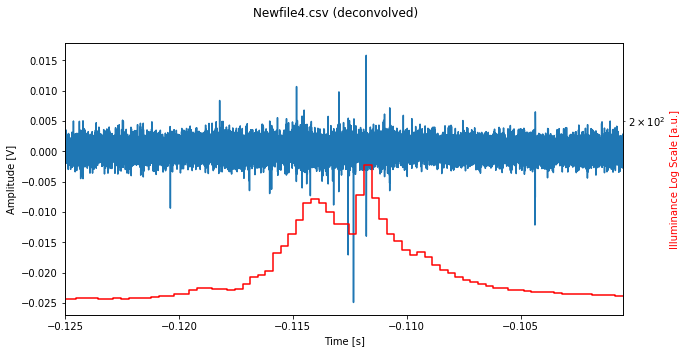

In [2]:
def t2i(t):
    return int((t+7e-1)/1e-6)

import numpy as np

_i = np.arange(500)
_impresp = np.cos(_i*0.555)*np.exp(-_i*0.01)
def deconv(x):
    from scipy.signal import deconvolve
    q, _ = deconvolve(x, _impresp)
    return q

def plotrecovered(tfrom, tto):
    a, b = t2i(tfrom), t2i(tto)
    
    f, (ax2) = plt.subplots(1, 1, sharex=True, figsize=(10, 5))
    q = deconv(sig[a:b])
    f.suptitle('Newfile4.csv (deconvolved)')
    ax2.set_xlim(tfrom, tto-len(_impresp)*1e-6)
    ax2.plot(t[a:b-len(_impresp)+1], q)
    ax2.set_ylabel('Amplitude [V]')
    ax2.set_xlabel('Time [s]')
    ax1 = ax2.twinx()
    ax1.plot(camt, camsig, color='r', drawstyle='steps-post')
    ax1.set_yscale('log')
    ax1.set_ylabel('Illuminance Log Scale [a.u.]', color='r')
    #ax3.plot(t[a:b], sig[a:b])
    plt.show()

plotrecovered(-125e-3, -100e-3)

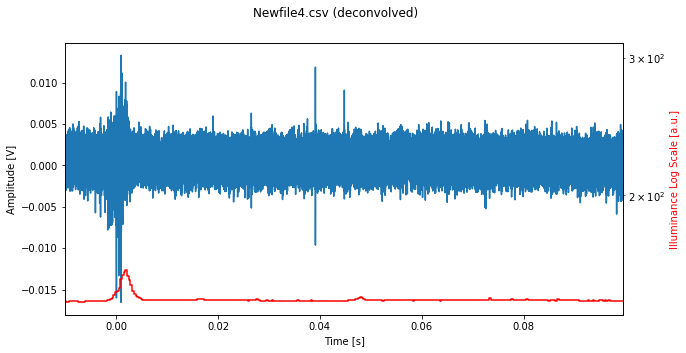

In [21]:
plotrecovered(-10e-3, 100e-3)

ZeroDivisionError: integer division or modulo by zero

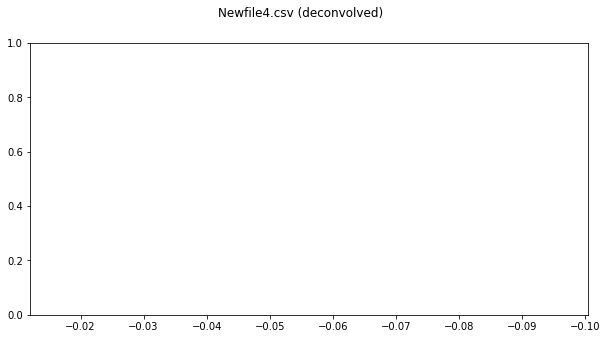

In [6]:
def t2i(t):
    return int((t+7e-1)/1e-6)

import numpy as np

_i = np.arange(500)
_impresp = np.cos(_i*0.555)*np.exp(-_i*0.01)
def deconv(x):
    from scipy.signal import deconvolve
    q, _ = deconvolve(x, _impresp)
    return q

def plotrecovered(tfrom, tto):
    import scipy as sc

    a, b = t2i(tfrom), t2i(tto)
    
    f, (ax2) = plt.subplots(1, 1, sharex=True, figsize=(10, 5))
    q = deconv(sig[a:b])
    f.suptitle('Newfile4.csv (deconvolved)')
    ax2.set_xlim(tfrom, tto-len(_impresp)*1e-6)
    plt.plot(t[a:b-len(_impresp)], sc.signal.detrend(sc.integrate.cumtrapz(q)))
    ax2.plot(t[a:b-len(_impresp)+1], q)
    ax2.set_ylabel('Amplitude [V]')
    ax2.set_xlabel('Time [s]')
    ax1 = ax2.twinx()
    ax1.plot(camt, camsig, color='r', drawstyle='steps-post')
    ax1.set_yscale('log')
    ax1.set_ylabel('Illuminance Log Scale [a.u.]', color='r')
    #ax3.plot(t[a:b], sig[a:b])
    plt.show()

plotrecovered(-12e-3, -100e-3)

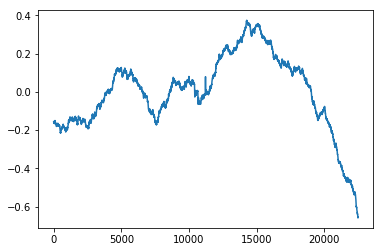

In [4]:
import scipy as sc

a, b = t2i(-123e-3), t2i(-100e-3)
q = deconv(sig[a:b])
plt.plot(sc.signal.detrend(sc.integrate.cumtrapz(q)))